# Predicción de Oportunidades

Objetivo: Predecir oportunidad de resultados (columna Opportunities Result)

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
%matplotlib inline
%config InlineBackend.figure_format ='retina'
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [171]:
# Definición de columnas

column_names = ['Opportunity Number', 'Supplies Subgroup', 'Supplies Group', 'Opportunity Result', 'Sales Stage Change Count', 
'Total Days Identified Through Closing', 'Total Days Identified Through Qualified', 'Opportunity Amount USD',
 'Client Size By Revenue', 'Client Size By Employee Count', 'Revenue From Client Past Two Years', 
 'Competitor Type', 'Deal Size Category', 'Lat', 'Lon', 'Country_Code']

In [172]:
# Import data set
#oportunities = pd.read_csv('D:\BD\oportunidad.csv',  names=column_names)
oportunities = pd.read_csv('D:\BD\oportunidad.csv', header = 0, decimal=".")
countries = pd.read_excel('D:\BD\Countries.xlsx', header=0)
print(oportunities.shape)
print(countries.shape)

(31823, 16)
(9, 2)


In [173]:
oportunities.head()
#countries.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat,Lon,Country_Code
0,NaN,Car Electronics,Car Electronics,Won,5,94,90,469000,1,1,0,None,6,-16.130262,-63.808594,1
1,NaN,Garage & Car Care,Car Accessories,Won,4,4,4,5000,3,2,0,Unknown,1,-16.130262,-63.808594,1
2,NaN,Shelters & RV,Performance & Non-auto,Loss,4,71,71,200000,3,1,0,Unknown,5,-16.130262,-63.808594,1
3,NaN,Motorcycle Parts,Performance & Non-auto,Loss,2,46,46,120000,5,1,0,Unknown,5,-16.130262,-63.808594,1
4,NaN,Replacement Parts,Car Accessories,Won,3,6,6,12000,1,1,0,Unknown,2,-16.130262,-63.808594,1


In [174]:
oportunities.info()
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31823 entries, 0 to 31822
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31823 non-null  object 
 2   Supplies Group                           31823 non-null  object 
 3   Opportunity Result                       31823 non-null  object 
 4   Sales Stage Change Count                 31823 non-null  int64  
 5   Total Days Identified Through Closing    31823 non-null  int64  
 6   Total Days Identified Through Qualified  31823 non-null  int64  
 7   Opportunity Amount USD                   31823 non-null  int64  
 8   Client Size By Revenue                   31823 non-null  int64  
 9   Client Size By Employee Count            31823 non-null  int64  
 10  Revenue From Client Past Two Years       31823

In [175]:
oportunities.describe()

,Opportunity Number,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category,Lat,Lon,Country_Code
count,3.151500e+04,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000
mean,7.654080e+06,2.959275,16.682745,16.267291,91563.816391,1.621972,1.607894,0.304183,3.440719,-9.493641,-69.584912,4.201458
std,1.053939e+06,1.495948,16.615356,16.493823,132124.774314,1.239402,1.215011,0.934192,1.652327,10.574946,8.658619,1.911526
min,1.674737e+06,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-24.367114,-79.453125,1.000000
25%,6.896082e+06,2.000000,4.000000,4.000000,15000.000000,1.000000,1.000000,0.000000,2.000000,-16.130262,-75.585938,3.000000
50%,7.545469e+06,3.000000,12.000000,12.000000,49418.000000,1.000000,1.000000,0.000000,3.000000,-9.275622,-68.730469,4.000000
75%,8.232192e+06,3.000000,24.000000,24.000000,105000.000000,1.000000,1.000000,0.000000,5.000000,-1.230374,-65.170898,6.000000
max,1.009423e+07,20.000000,192.000000,192.000000,1000000.000000,5.000000,5.000000,4.000000,7.000000,7.928675,-47.109375,7.000000


In [176]:
oportunities.isnull().sum()

Opportunity Number                         308
Supplies Subgroup                            0
Supplies Group                               0
Opportunity Result                           0
Sales Stage Change Count                     0
Total Days Identified Through Closing        0
Total Days Identified Through Qualified      0
Opportunity Amount USD                       0
Client Size By Revenue                       0
Client Size By Employee Count                0
Revenue From Client Past Two Years           0
Competitor Type                              0
Deal Size Category                           0
Lat                                          0
Lon                                          0
Country_Code                                 0
dtype: int64

In [177]:
oportunities=oportunities.dropna()
oportunities.isnull().sum()

Opportunity Number                         0
Supplies Subgroup                          0
Supplies Group                             0
Opportunity Result                         0
Sales Stage Change Count                   0
Total Days Identified Through Closing      0
Total Days Identified Through Qualified    0
Opportunity Amount USD                     0
Client Size By Revenue                     0
Client Size By Employee Count              0
Revenue From Client Past Two Years         0
Competitor Type                            0
Deal Size Category                         0
Lat                                        0
Lon                                        0
Country_Code                               0
dtype: int64

In [178]:
oportunities_countries = pd.merge(oportunities, countries, how = 'left', left_on = 'Country_Code', right_on='ID')

oportunities_countries.head()


,Opportunity Number,Supplies Subgroup,Supplies Group,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat,Lon,Country_Code,Country,ID
0,10001129.0,Replacement Parts,Car Accessories,Won,4,3,3,15000,1,1,2,Unknown,2,-16.130262,-63.808594,1,Bolivia,1
1,10002203.0,Motorcycle Parts,Performance & Non-auto,Loss,2,0,0,4000,1,1,0,Unknown,1,-16.130262,-63.808594,1,Bolivia,1
2,10002445.0,Garage & Car Care,Car Accessories,Won,2,3,3,20000,1,1,3,Unknown,2,-16.130262,-63.808594,1,Bolivia,1
3,10002922.0,Garage & Car Care,Car Accessories,Loss,2,3,3,100000,1,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia,1
4,10002982.0,Motorcycle Parts,Performance & Non-auto,Loss,1,0,0,40000,1,1,0,Unknown,3,-16.130262,-63.808594,1,Bolivia,1


In [179]:
oportunities_2 = oportunities_countries.dropna()
oportunities_2.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat,Lon,Country_Code,Country,ID
0,10001129.0,Replacement Parts,Car Accessories,Won,4,3,3,15000,1,1,2,Unknown,2,-16.130262,-63.808594,1,Bolivia,1
1,10002203.0,Motorcycle Parts,Performance & Non-auto,Loss,2,0,0,4000,1,1,0,Unknown,1,-16.130262,-63.808594,1,Bolivia,1
2,10002445.0,Garage & Car Care,Car Accessories,Won,2,3,3,20000,1,1,3,Unknown,2,-16.130262,-63.808594,1,Bolivia,1
3,10002922.0,Garage & Car Care,Car Accessories,Loss,2,3,3,100000,1,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia,1
4,10002982.0,Motorcycle Parts,Performance & Non-auto,Loss,1,0,0,40000,1,1,0,Unknown,3,-16.130262,-63.808594,1,Bolivia,1


In [180]:
oportunities_2.describe()

,Opportunity Number,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category,Lat,Lon,Country_Code,ID
count,3.151500e+04,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000,31515.000000
mean,7.654080e+06,2.960019,16.695193,16.279042,91626.575726,1.621514,1.606537,0.304776,3.442646,-9.495186,-69.582624,4.201142,4.201142
std,1.053939e+06,1.497175,16.616890,16.495987,132141.622807,1.238816,1.213737,0.935192,1.652116,10.576088,8.657581,1.911492,1.911492
min,1.674737e+06,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-24.367114,-79.453125,1.000000,1.000000
25%,6.896082e+06,2.000000,4.000000,4.000000,15000.000000,1.000000,1.000000,0.000000,2.000000,-16.130262,-75.585938,3.000000,3.000000
50%,7.545469e+06,3.000000,12.000000,12.000000,49875.000000,1.000000,1.000000,0.000000,3.000000,-9.275622,-68.730469,4.000000,4.000000
75%,8.232192e+06,3.000000,24.000000,24.000000,105000.000000,1.000000,1.000000,0.000000,5.000000,-1.230374,-65.170898,6.000000,6.000000
max,1.009423e+07,20.000000,192.000000,192.000000,1000000.000000,5.000000,5.000000,4.000000,7.000000,7.928675,-47.109375,7.000000,7.000000


In [181]:
oportunities_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31515 entries, 0 to 31514
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31515 non-null  object 
 2   Supplies Group                           31515 non-null  object 
 3   Opportunity Result                       31515 non-null  object 
 4   Sales Stage Change Count                 31515 non-null  int64  
 5   Total Days Identified Through Closing    31515 non-null  int64  
 6   Total Days Identified Through Qualified  31515 non-null  int64  
 7   Opportunity Amount USD                   31515 non-null  int64  
 8   Client Size By Revenue                   31515 non-null  int64  
 9   Client Size By Employee Count            31515 non-null  int64  
 10  Revenue From Client Past Two Years       31515

In [182]:
# Data Analysis
# Select numerical columns
# Select categorical columns
num_columns = oportunities_2[['Opportunity Number', 'Sales Stage Change Count', 'Total Days Identified Through Closing', 
'Total Days Identified Through Qualified', 'Opportunity Amount USD', 'Client Size By Revenue', 
'Client Size By Employee Count', 'Revenue From Client Past Two Years', 'Deal Size Category', 'Lat', 'Lon',
'Country_Code', 'ID']]

cat_columns = oportunities_2[['Supplies Subgroup', 'Supplies Group','Opportunity Result', 'Competitor Type',
'Country']]




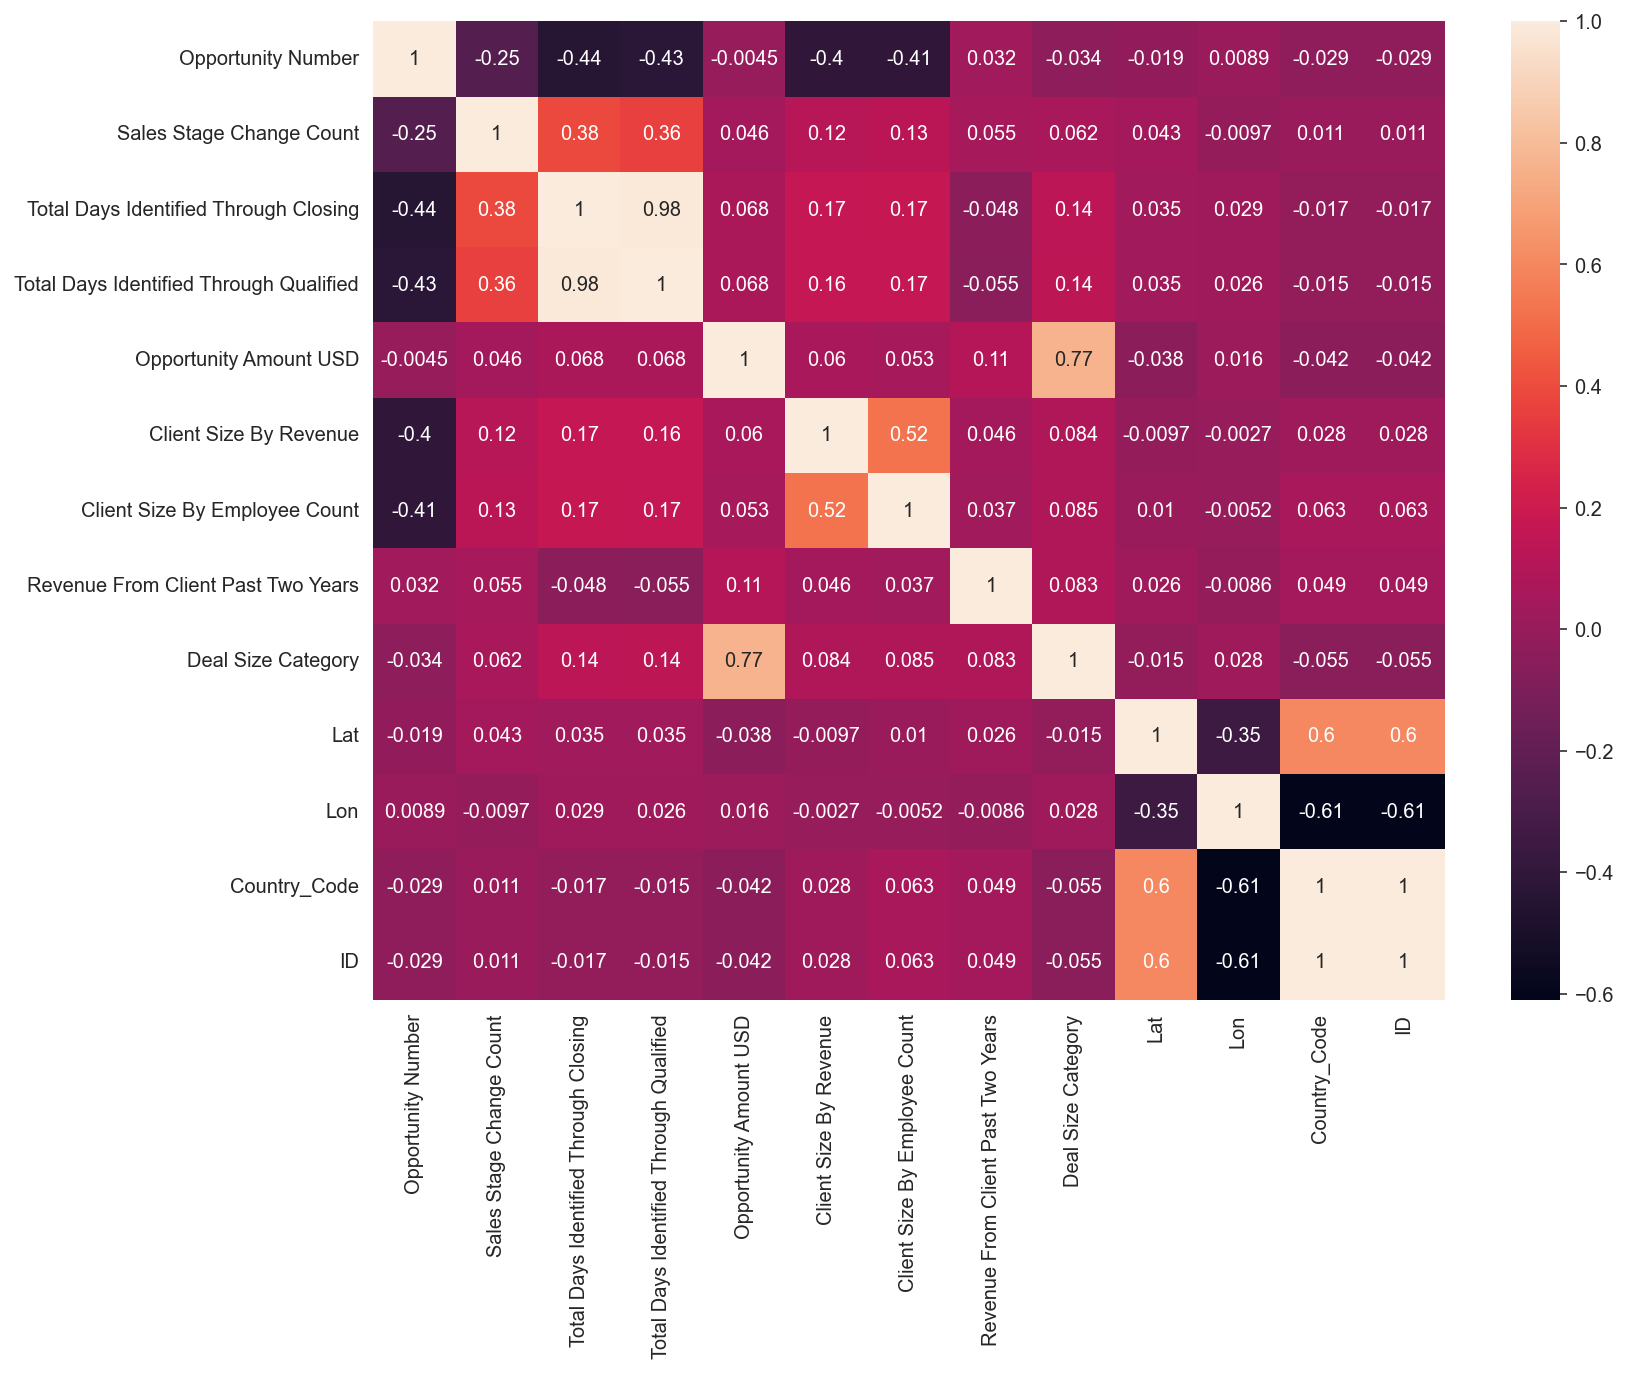

In [183]:
#Show correlation between numeric columns

oportunities_2_corr = oportunities_2.corr()
plt.subplots(figsize=(12,9))
heatmap = sns.heatmap(oportunities_2_corr, annot=True)

c:\Users\Alejandro Arenas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Alejandro Arenas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Alejandro Arenas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

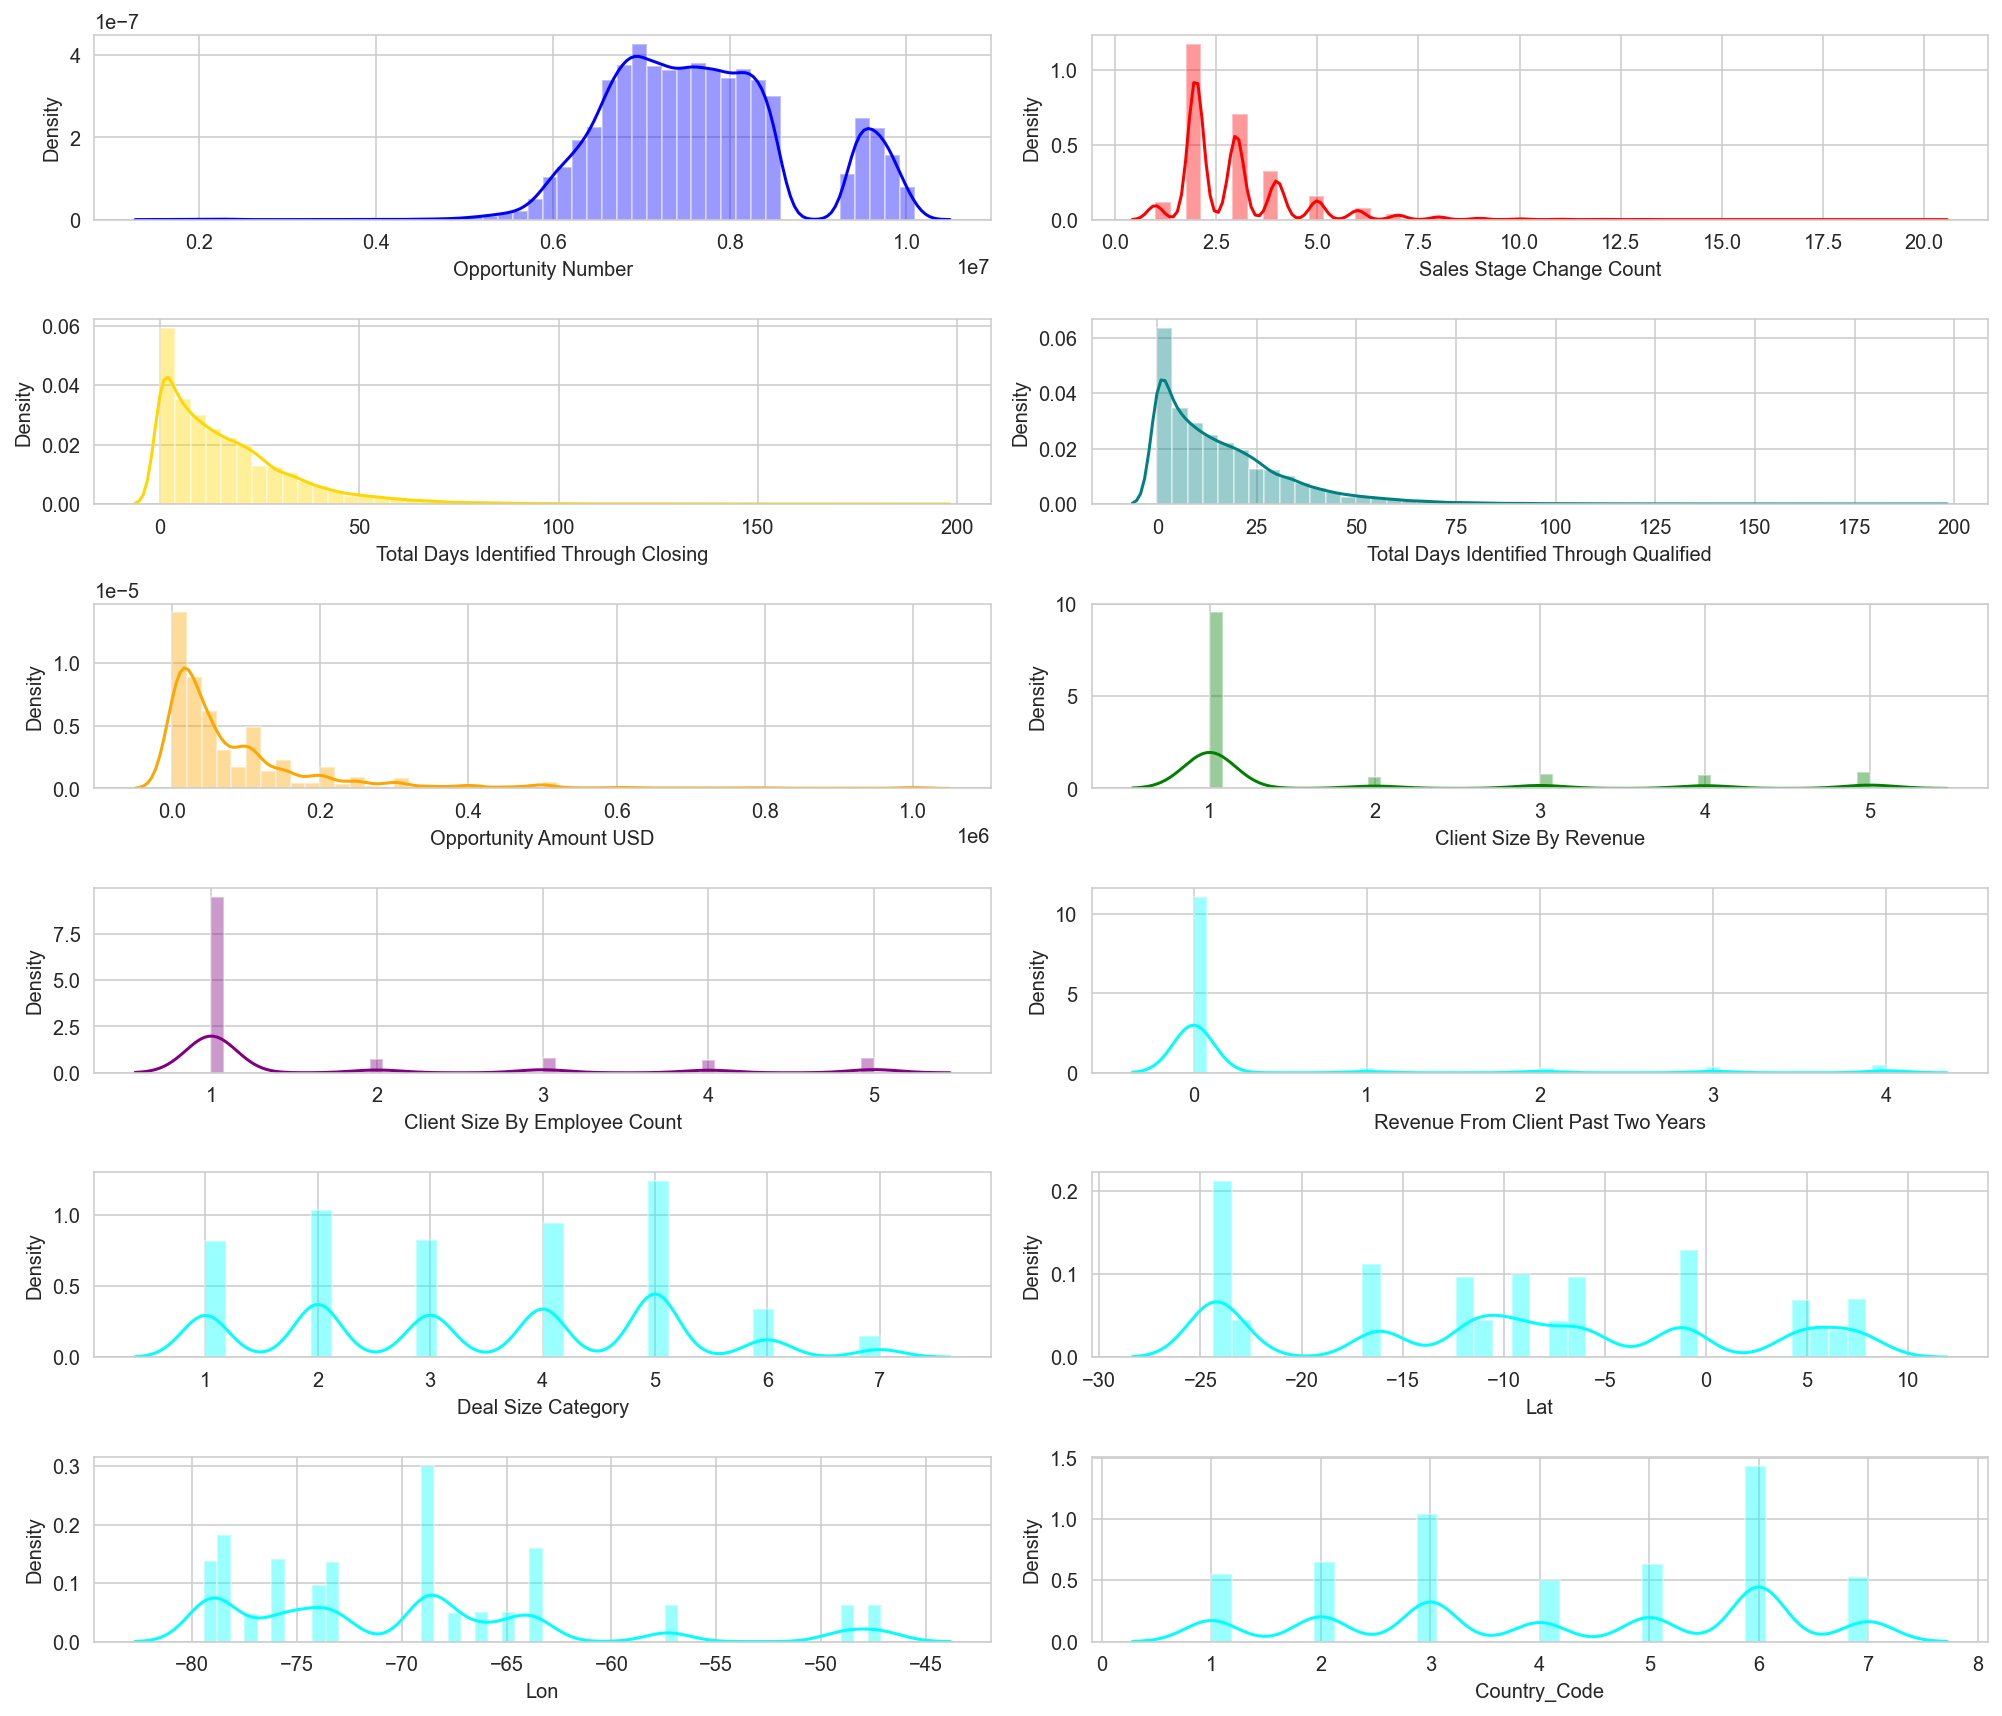

In [184]:
# Plot distribution of numerical columns
fig, axes = plt.subplots(6,2, figsize=(14,12))
sns.distplot(oportunities_2['Opportunity Number'], color='blue', ax=axes[0,0])
sns.distplot(oportunities_2['Sales Stage Change Count'], color='red', ax=axes[0,1])
sns.distplot(oportunities_2['Total Days Identified Through Closing'], color='gold', ax=axes[1,0])
sns.distplot(oportunities_2['Total Days Identified Through Qualified'], color='teal', ax=axes[1,1])
sns.distplot(oportunities_2['Opportunity Amount USD'], color='orange', ax=axes[2,0])
sns.distplot(oportunities_2['Client Size By Revenue'], color='green', ax=axes[2,1])
sns.distplot(oportunities_2['Client Size By Employee Count'], color='purple', ax=axes[3,0])
sns.distplot(oportunities_2['Revenue From Client Past Two Years'], color='cyan', ax=axes[3,1])
sns.distplot(oportunities_2['Deal Size Category'], color='cyan', ax=axes[4,0])
sns.distplot(oportunities_2['Lat'], color='cyan', ax=axes[4,1])
sns.distplot(oportunities_2['Lon'], color='cyan', ax=axes[5,0])
sns.distplot(oportunities_2['Country_Code'], color='cyan', ax=axes[5,1])
plt.tight_layout()


c:\Users\Alejandro Arenas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Alejandro Arenas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Alejandro Arenas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

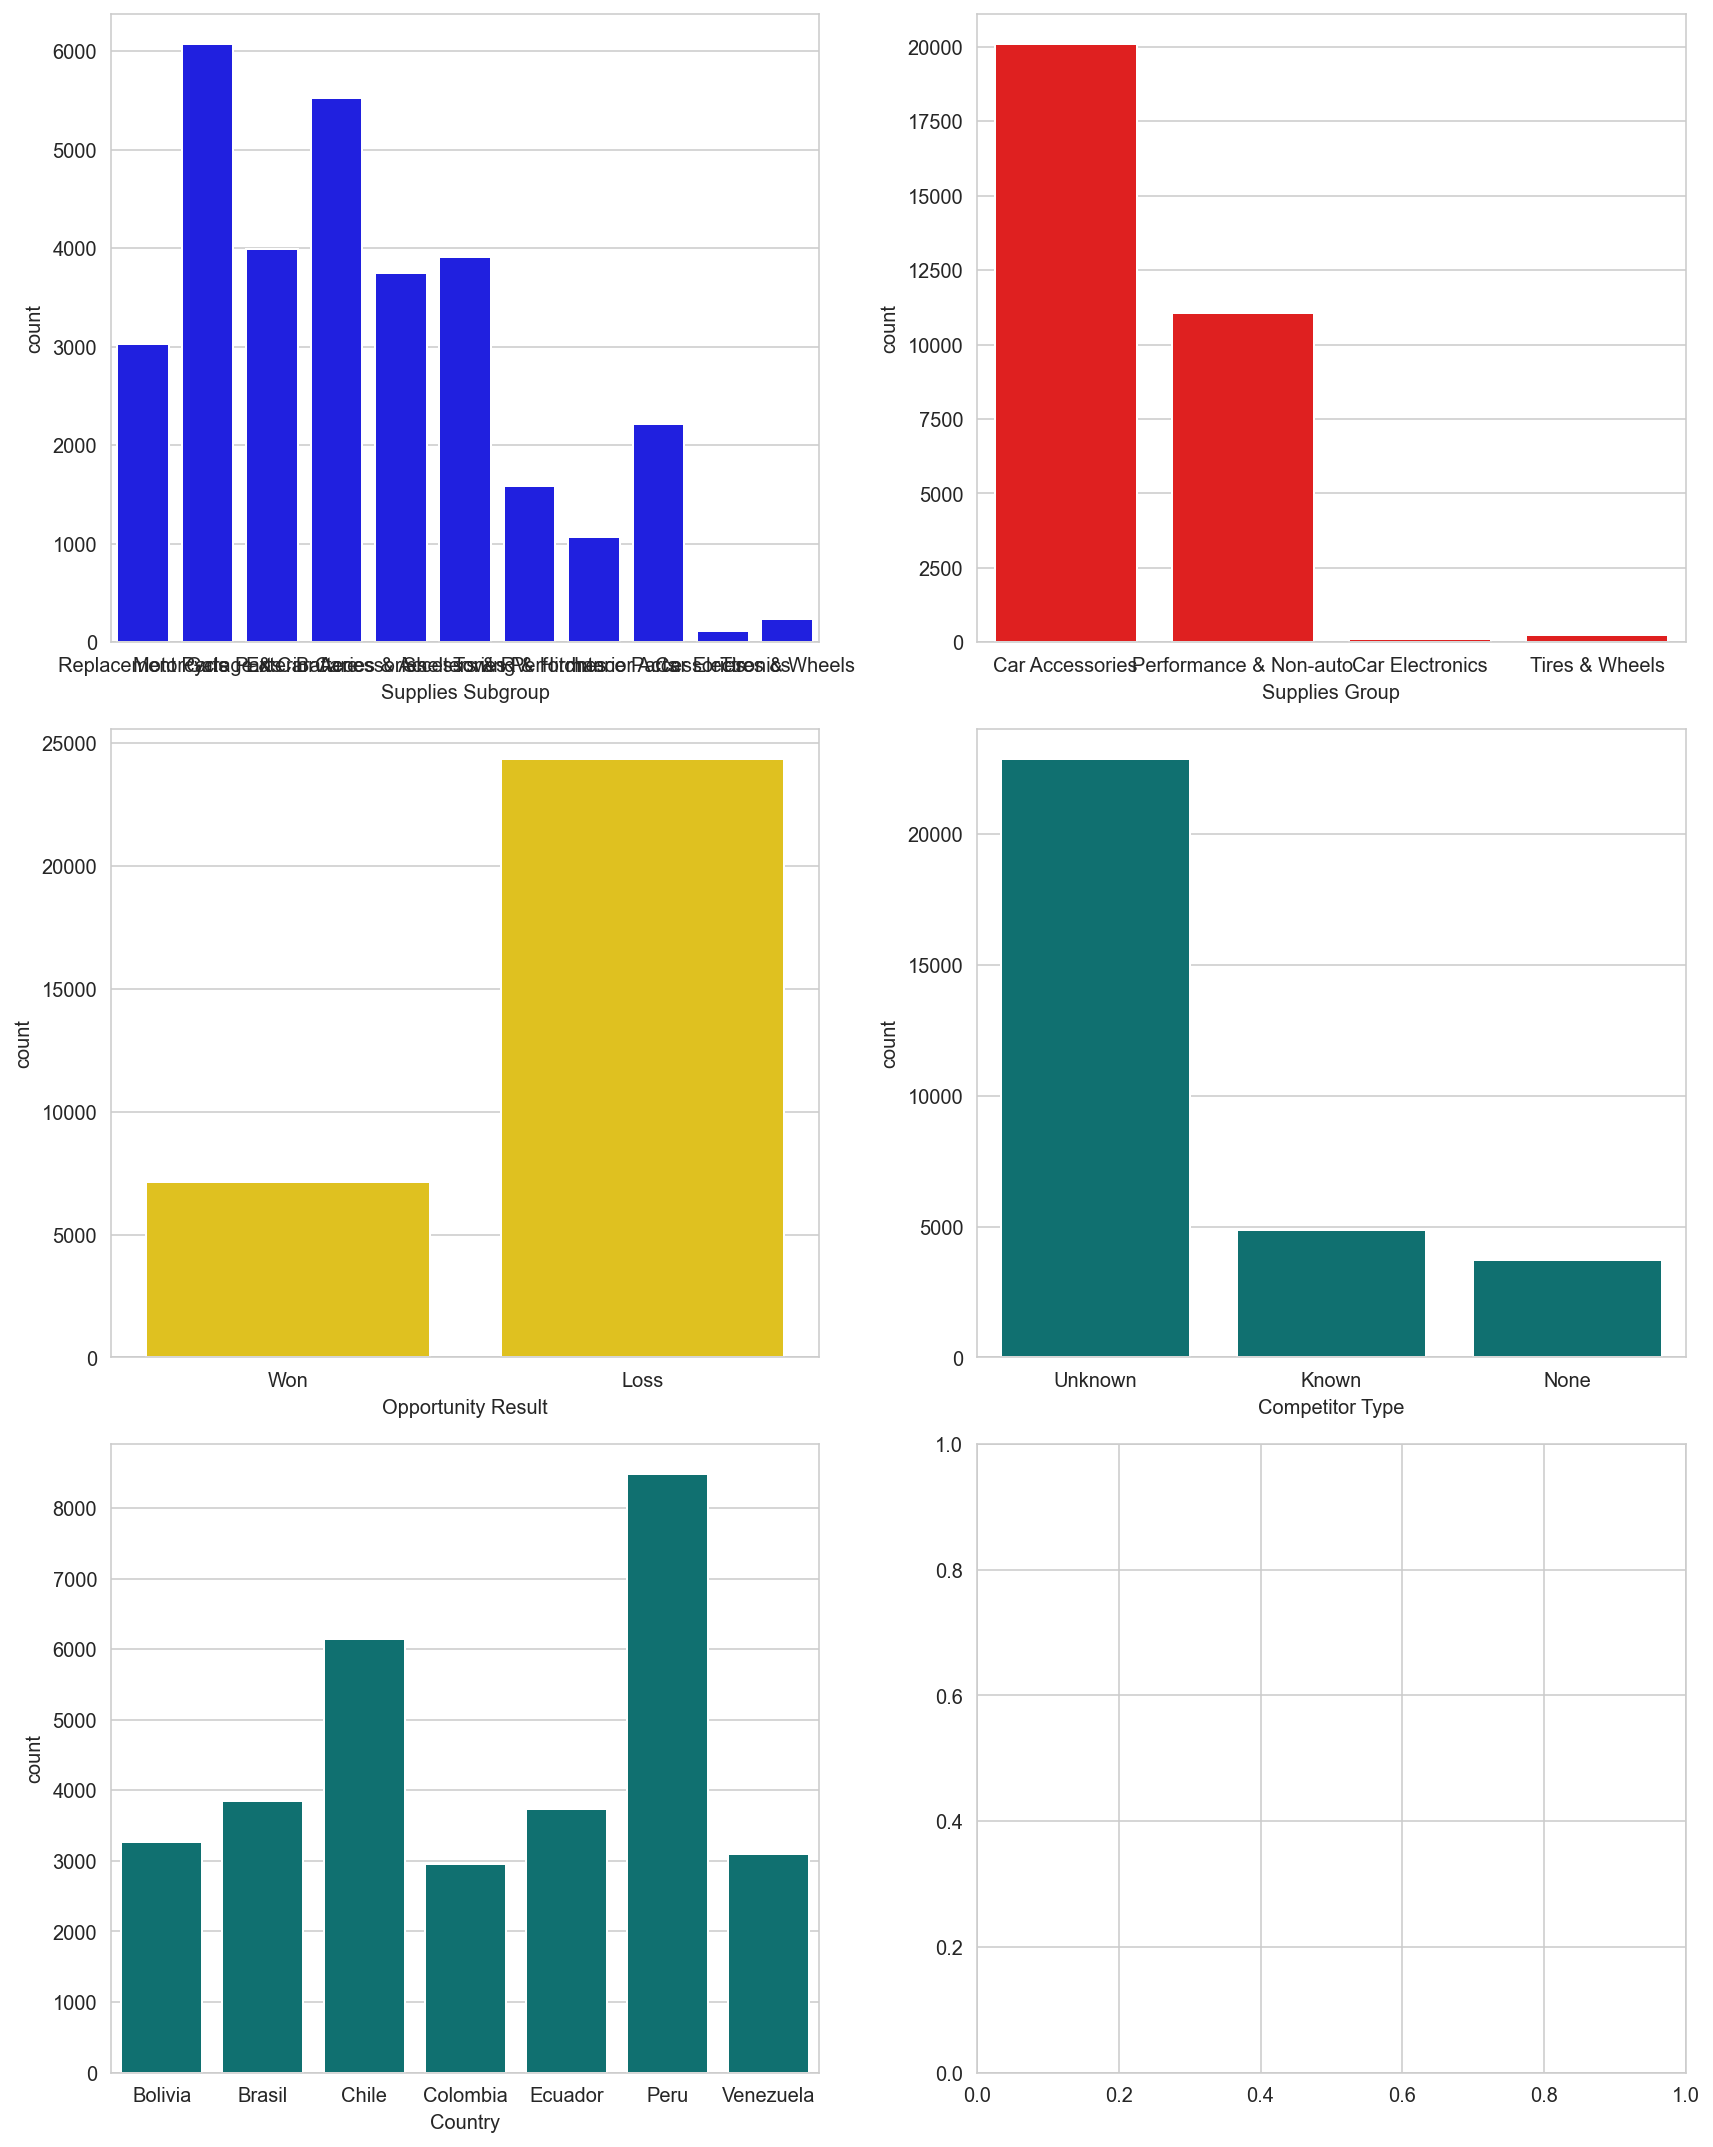

In [185]:
#Plot categorical columns
fig, axes = plt.subplots(3,2, figsize=(12,15))
sns.countplot(oportunities_2['Supplies Subgroup'], color='blue', ax=axes[0,0])
sns.countplot(oportunities_2['Supplies Group'], color='red', ax=axes[0,1])
sns.countplot(oportunities_2['Opportunity Result'], color='gold', ax=axes[1,0])
sns.countplot(oportunities_2['Competitor Type'], color='teal', ax=axes[1,1])
sns.countplot(oportunities_2['Country'], color='teal', ax=axes[2,0])
plt.tight_layout()


Strong class imbalance distribution from competitor type, opportunity Ammount.

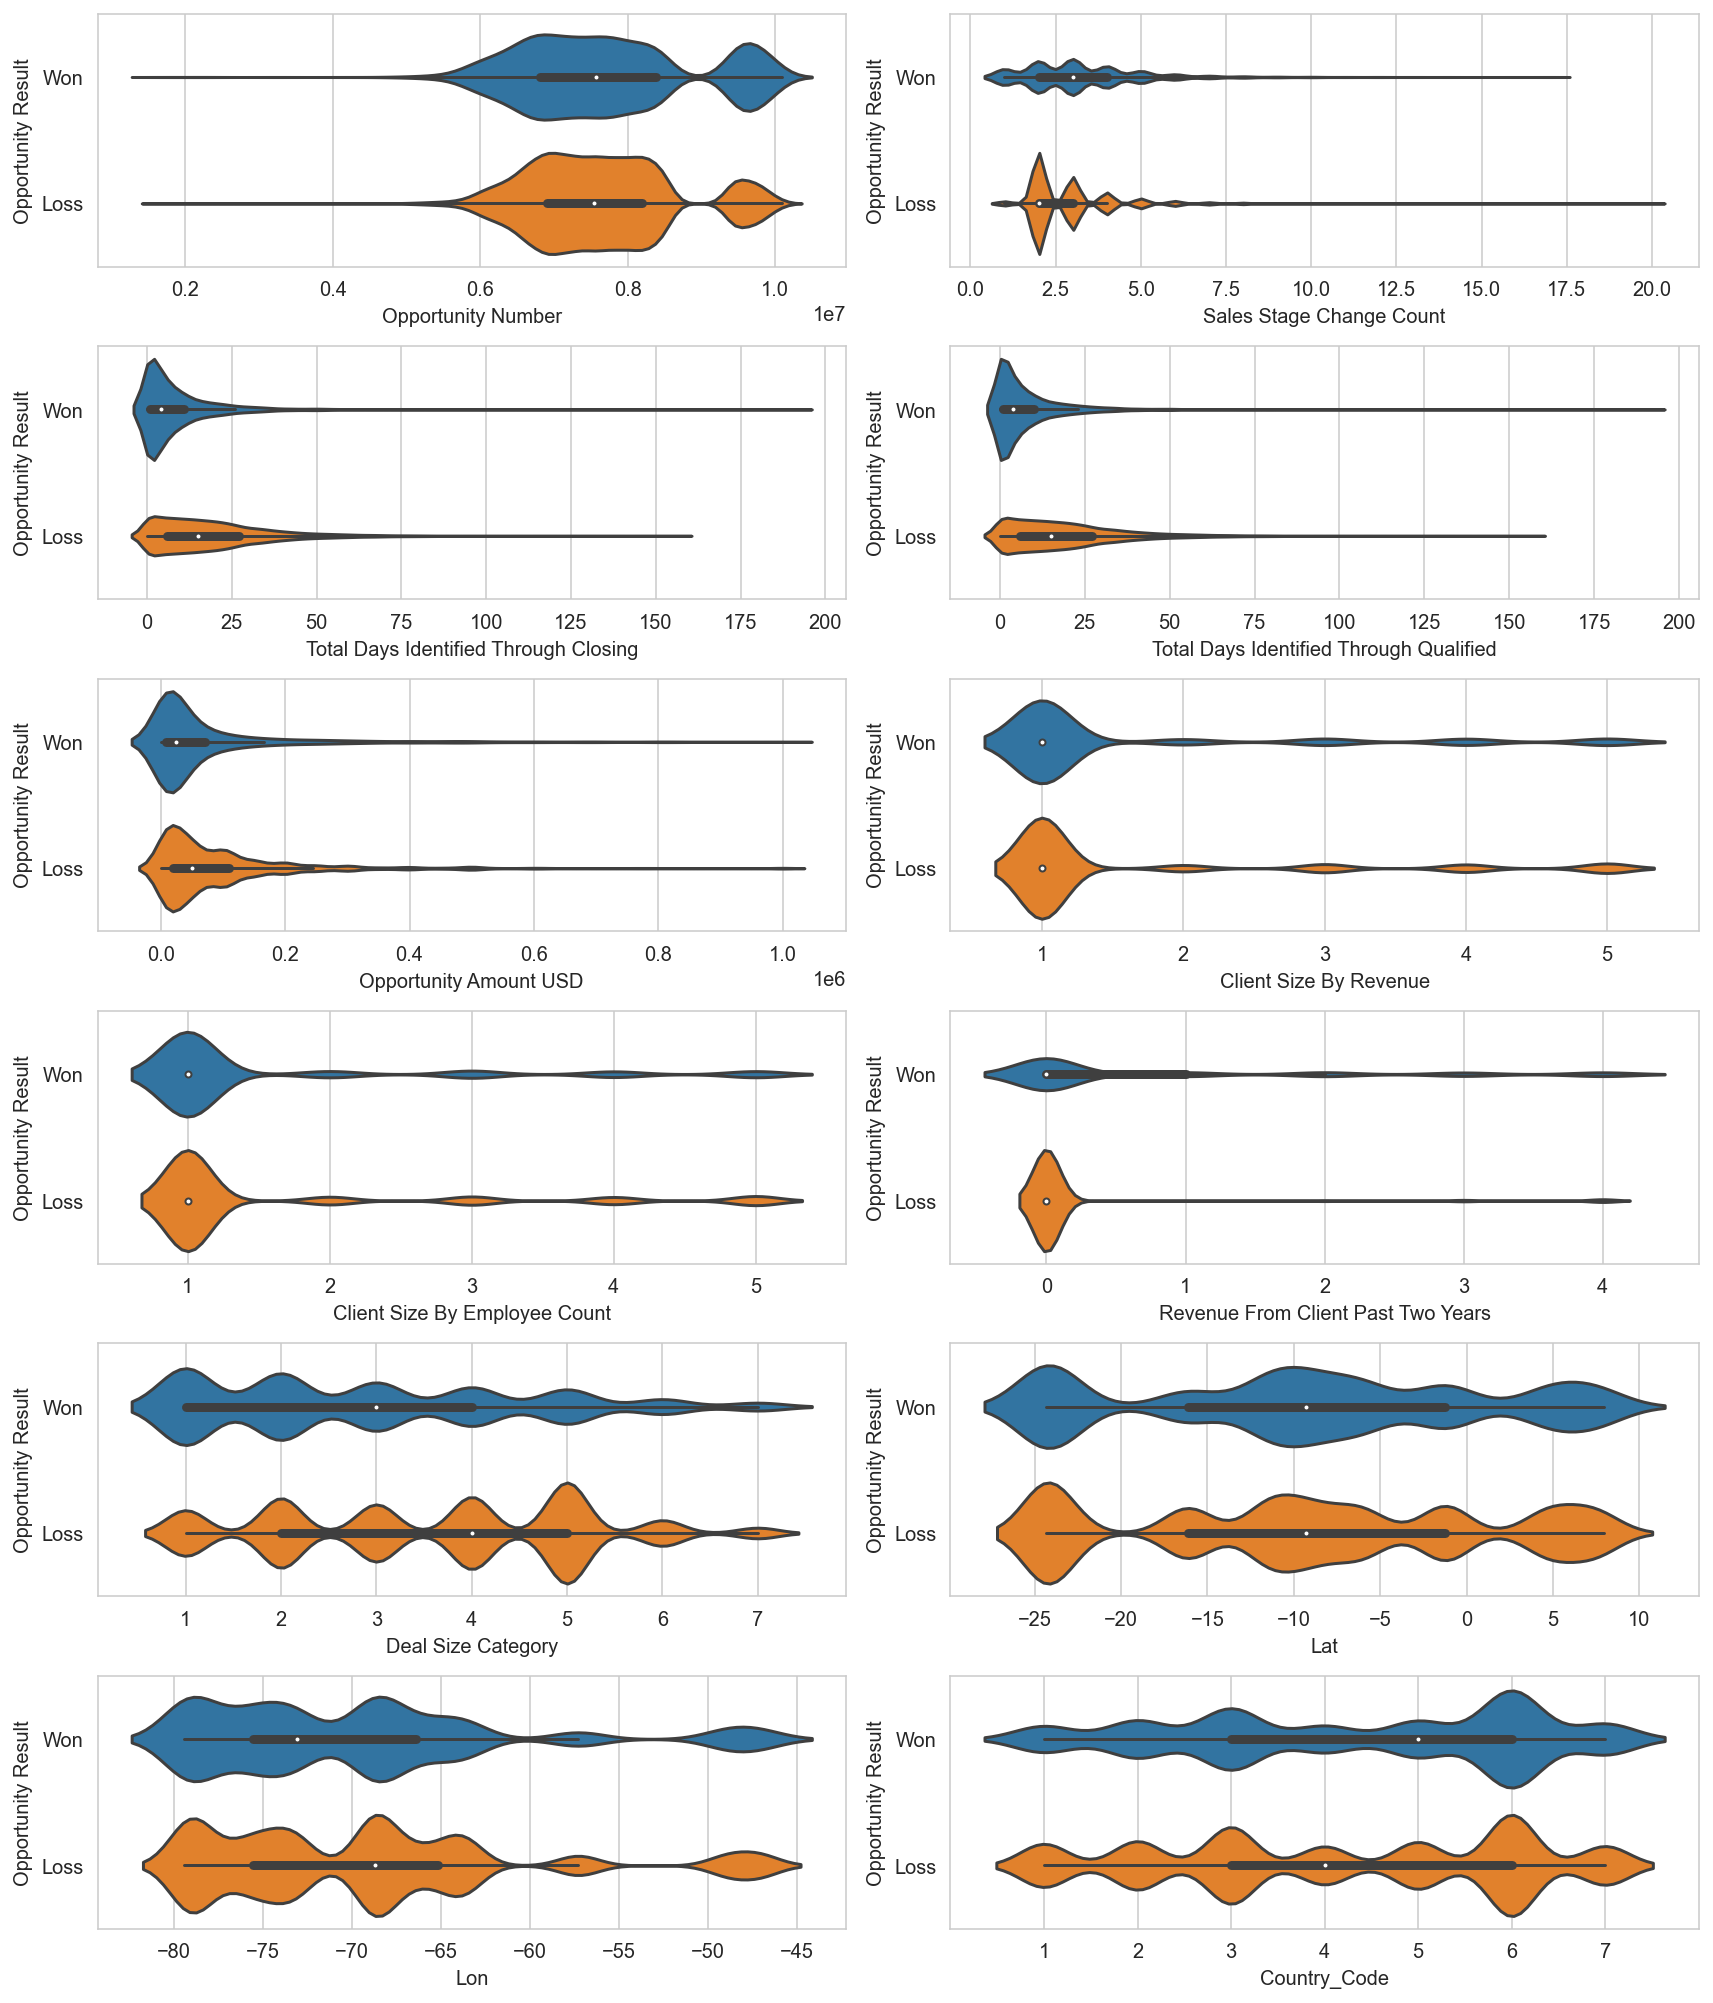

In [186]:
# Analyse the distribution of the target "opportunity result" column against numerical and categorical columns
fig, axes = plt.subplots(6,2, figsize=(12,14))
sns.violinplot(x= oportunities_2['Opportunity Number'], y= oportunities_2['Opportunity Result'] , ax=axes[0,0])
sns.violinplot(x=oportunities_2['Sales Stage Change Count'],y= oportunities_2['Opportunity Result'] , ax=axes[0,1])
sns.violinplot(x=oportunities_2['Total Days Identified Through Closing'],y= oportunities_2['Opportunity Result'],  ax=axes[1,0])
sns.violinplot(x=oportunities_2['Total Days Identified Through Qualified'],y= oportunities_2['Opportunity Result'] , ax=axes[1,1])
sns.violinplot(x=oportunities_2['Opportunity Amount USD'],y= oportunities_2['Opportunity Result'], ax=axes[2,0])
sns.violinplot(x=oportunities_2['Client Size By Revenue'],y= oportunities_2['Opportunity Result'] , ax=axes[2,1])
sns.violinplot(x=oportunities_2['Client Size By Employee Count'], y= oportunities_2['Opportunity Result'], ax=axes[3,0])
sns.violinplot(x=oportunities_2['Revenue From Client Past Two Years'], y= oportunities_2['Opportunity Result'], ax=axes[3,1])
sns.violinplot(x=oportunities_2['Deal Size Category'], y= oportunities_2['Opportunity Result'], ax=axes[4,0])
sns.violinplot(x=oportunities_2['Lat'], y= oportunities_2['Opportunity Result'], ax=axes[4,1])
sns.violinplot(x=oportunities_2['Lon'], y= oportunities_2['Opportunity Result'], ax=axes[5,0])
sns.violinplot(x=oportunities_2['Country_Code'], y= oportunities_2['Opportunity Result'], ax=axes[5,1])
plt.tight_layout()


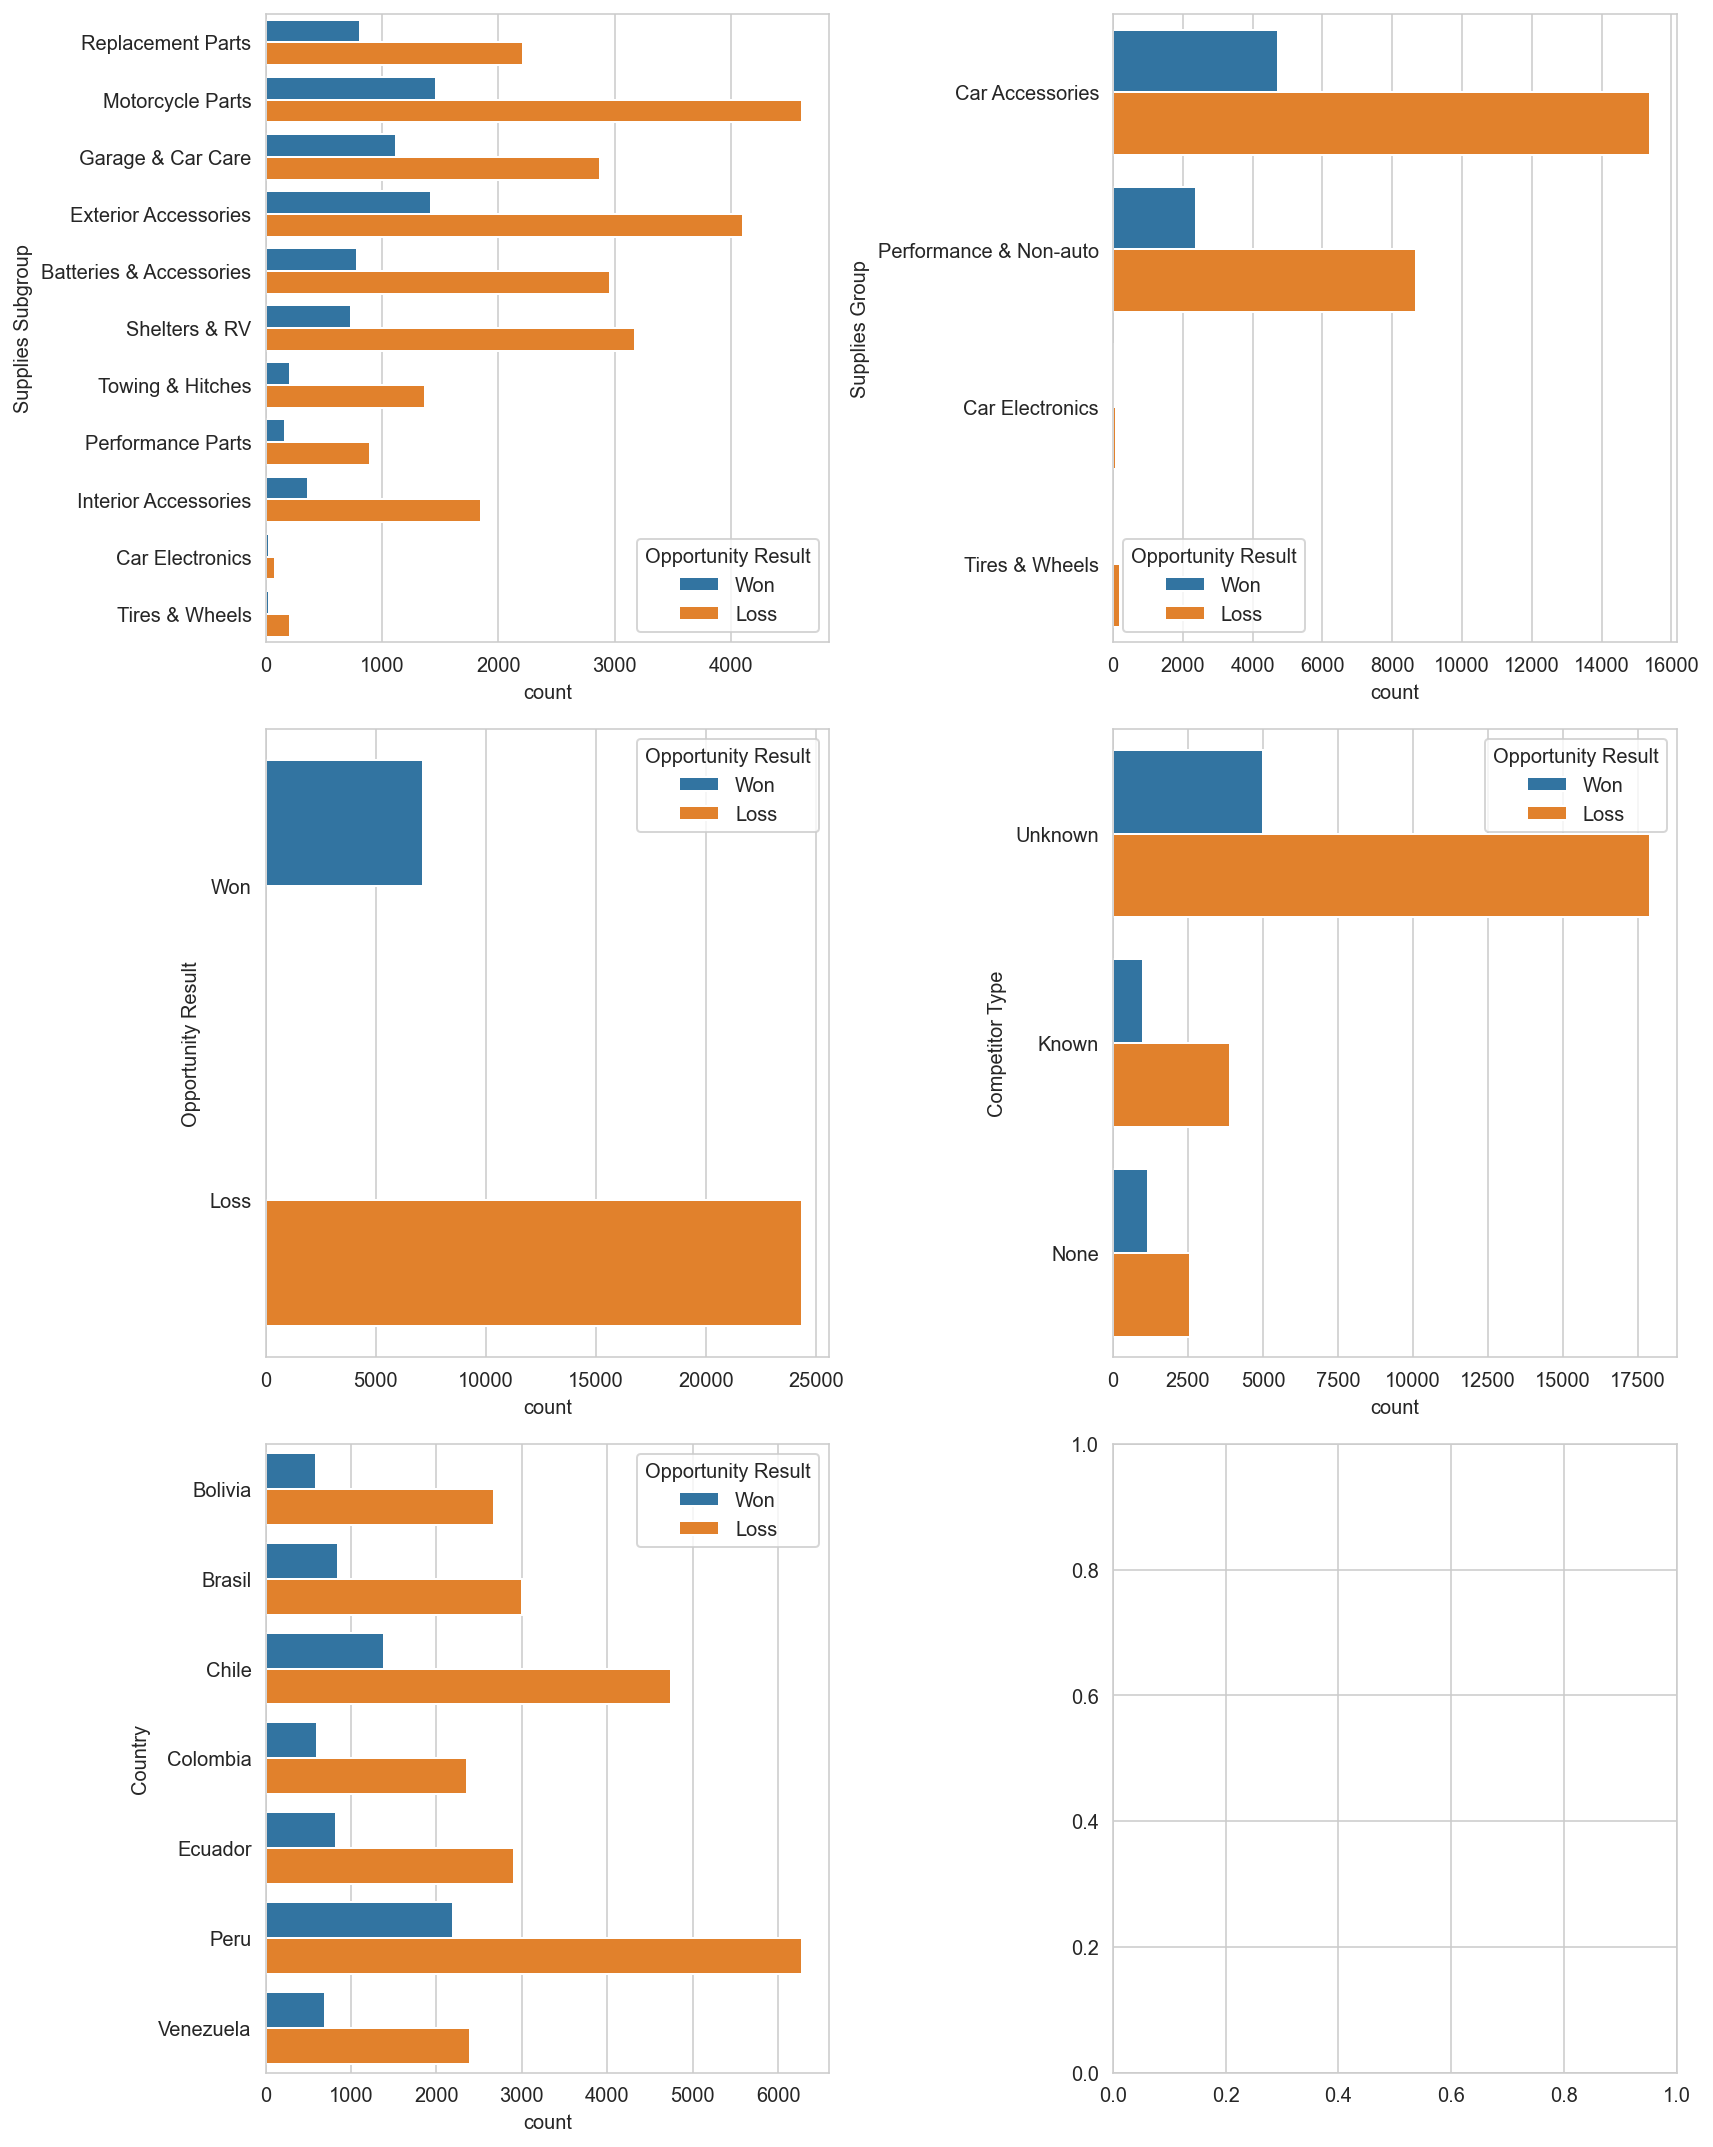

In [77]:
fig, axes = plt.subplots(3,2, figsize=(12,15))
sns.countplot(y=oportunities_2['Supplies Subgroup'], hue= oportunities_2['Opportunity Result'], ax=axes[0,0])
sns.countplot(y=oportunities_2['Supplies Group'], hue= oportunities_2['Opportunity Result'], ax=axes[0,1])
sns.countplot(y=oportunities_2['Opportunity Result'], hue= oportunities_2['Opportunity Result'], ax=axes[1,0])
sns.countplot(y=oportunities_2['Competitor Type'], hue= oportunities_2['Opportunity Result'], ax=axes[1,1])
sns.countplot(y=oportunities_2['Country'], hue= oportunities_2['Opportunity Result'], ax=axes[2,0])
plt.tight_layout()

In [187]:
# Change values in opportunities result into binary results and competitor type grouped into 3 different classes
oportunities_2['Opportunity Result'] = oportunities_2['Opportunity Result'].map(lambda x: 0 if x == 'Loss' else 1)
oportunities_2['Competitor Type'] = oportunities_2['Competitor Type'].map(lambda x: 1 if x == 'Known' else 0 if x == 'Unknown' else -1)


In [188]:
oportunities_2.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 31515 entries, 0 to 31514
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31515 non-null  object 
 2   Supplies Group                           31515 non-null  object 
 3   Opportunity Result                       31515 non-null  int64  
 4   Sales Stage Change Count                 31515 non-null  int64  
 5   Total Days Identified Through Closing    31515 non-null  int64  
 6   Total Days Identified Through Qualified  31515 non-null  int64  
 7   Opportunity Amount USD                   31515 non-null  int64  
 8   Client Size By Revenue                   31515 non-null  int64  
 9   Client Size By Employee Count            31515 non-null  int64  
 10  Revenue From Client Past Two Years       31515

In [134]:
# comparing Supplies Group and Supplies Subgroup columns

oportunities_2.groupby(['Supplies Subgroup'])['Supplies Group'].count()





Supplies Subgroup
Batteries & Accessories    3746
Car Electronics             118
Exterior Accessories       5529
Garage & Car Care          3992
Interior Accessories       2218
Motorcycle Parts           6075
Performance Parts          1071
Replacement Parts          3031
Shelters & RV              3910
Tires & Wheels              237
Towing & Hitches           1588
Name: Supplies Group, dtype: int64

In [189]:
oportunities_2.groupby(['Supplies Group'])['Supplies Subgroup'].count()


Supplies Group
Car Accessories           20104
Car Electronics             118
Performance & Non-auto    11056
Tires & Wheels              237
Name: Supplies Subgroup, dtype: int64

The supplies subgroup provides more detailed information compared to supplies group, therefore supplies group will be dropped. Similar with Total Days Identified Through Qualified and Total Days Identified Through Closing, are variables with a strong correlation. Country_Code and ID are the same, and Deal Size Category and Opportunity amount usd have a strong correlation too. 


In [190]:
oportunities_3 = oportunities_2.drop(['Total Days Identified Through Qualified', 'Supplies Group','ID', 'Deal Size Category'], axis=1)

In [191]:
oportunities_3.head() 

,Opportunity Number,Supplies Subgroup,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Lat,Lon,Country_Code,Country
0,10001129.0,Replacement Parts,1,4,3,15000,1,1,2,0,-16.130262,-63.808594,1,Bolivia
1,10002203.0,Motorcycle Parts,0,2,0,4000,1,1,0,0,-16.130262,-63.808594,1,Bolivia
2,10002445.0,Garage & Car Care,1,2,3,20000,1,1,3,0,-16.130262,-63.808594,1,Bolivia
3,10002922.0,Garage & Car Care,0,2,3,100000,1,1,0,0,-16.130262,-63.808594,1,Bolivia
4,10002982.0,Motorcycle Parts,0,1,0,40000,1,1,0,0,-16.130262,-63.808594,1,Bolivia


In [192]:
#Create dummy variables for categorical columns
oportunities_dummy = pd.get_dummies(oportunities_3[['Supplies Subgroup', 'Competitor Type', 'Country']],drop_first=True)
oportunities_dummy.info()

oportunities_dummy.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31515 entries, 0 to 31514
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Competitor Type                         31515 non-null  int64
 1   Supplies Subgroup_Car Electronics       31515 non-null  uint8
 2   Supplies Subgroup_Exterior Accessories  31515 non-null  uint8
 3   Supplies Subgroup_Garage & Car Care     31515 non-null  uint8
 4   Supplies Subgroup_Interior Accessories  31515 non-null  uint8
 5   Supplies Subgroup_Motorcycle Parts      31515 non-null  uint8
 6   Supplies Subgroup_Performance Parts     31515 non-null  uint8
 7   Supplies Subgroup_Replacement Parts     31515 non-null  uint8
 8   Supplies Subgroup_Shelters & RV         31515 non-null  uint8
 9   Supplies Subgroup_Tires & Wheels        31515 non-null  uint8
 10  Supplies Subgroup_Towing & Hitches      31515 non-null  uint8
 11  Country_Brasil 

,Competitor Type,Supplies Subgroup_Car Electronics,Supplies Subgroup_Exterior Accessories,Supplies Subgroup_Garage & Car Care,Supplies Subgroup_Interior Accessories,Supplies Subgroup_Motorcycle Parts,Supplies Subgroup_Performance Parts,Supplies Subgroup_Replacement Parts,Supplies Subgroup_Shelters & RV,Supplies Subgroup_Tires & Wheels,Supplies Subgroup_Towing & Hitches,Country_Brasil,Country_Chile,Country_Colombia,Country_Ecuador,Country_Peru,Country_Venezuela
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [193]:
#combine original dataset with new dummy variables
#Drop old cat columns
oportunities_3.drop(['Supplies Subgroup', 'Competitor Type', 'Country'], axis=1, inplace=True)
oportunities_3 = pd.concat([oportunities_3, oportunities_dummy], axis=1)
oportunities_3.head()



,Opportunity Number,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Lat,Lon,Country_Code,Competitor Type,Supplies Subgroup_Car Electronics,Supplies Subgroup_Exterior Accessories,Supplies Subgroup_Garage & Car Care,Supplies Subgroup_Interior Accessories,Supplies Subgroup_Motorcycle Parts,Supplies Subgroup_Performance Parts,Supplies Subgroup_Replacement Parts,Supplies Subgroup_Shelters & RV,Supplies Subgroup_Tires & Wheels,Supplies Subgroup_Towing & Hitches,Country_Brasil,Country_Chile,Country_Colombia,Country_Ecuador,Country_Peru,Country_Venezuela
0,10001129.0,1,4,3,15000,1,1,2,-16.130262,-63.808594,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,10002203.0,0,2,0,4000,1,1,0,-16.130262,-63.808594,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,10002445.0,1,2,3,20000,1,1,3,-16.130262,-63.808594,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10002922.0,0,2,3,100000,1,1,0,-16.130262,-63.808594,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10002982.0,0,1,0,40000,1,1,0,-16.130262,-63.808594,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Now we are ready to build a model to predict the result.
Prepare target/predictor variables and train/test sets


In [195]:
y = oportunities_3['Opportunity Result']
x = oportunities_3.drop(['Opportunity Result'], axis = 1)
print(y.value_counts())
baseline = 1-np.mean(y)
baseline



0    24360
1     7155
Name: Opportunity Result, dtype: int64


0.7729652546406474

In [203]:
#train/test sets

from random import random
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =100)
print("Training set")
print(x_train.shape)
print(y_train.shape)
print("------")
print("Test set")
print(x_test.shape)
print(y_test.shape)
print("------")
print("Accuracy")
print("Training set")
print(y_train.value_counts())
print("Training baseline accuracy:" + str(1-np.mean(y_train)))
print(y_test.value_counts())
print("Testing baseline accuracy:" + str(1-np.mean(y_test)))


Training set
(22060, 27)
(22060,)
------
Test set
(9455, 27)
(9455,)
------
Accuracy
Training set
0    17111
1     4949
Name: Opportunity Result, dtype: int64
Training baseline accuracy:0.7756572982774252
0    7249
1    2206
Name: Opportunity Result, dtype: int64
Testing baseline accuracy:0.7666842940243257


In [206]:
#Normalization/standarization of x
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
ss = StandardScaler()
xs_train = ss.fit_transform(x_train)
xs_test = ss.transform(x_test)


In [208]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier())

print("Shape before selection:" + str(x_train.shape))
select.fit(x_train, y_train)
xs_train = select.transform(xs_train)
xs_test = select.transform(xs_test)
print("shape after:" + str(xs_train.shape))



Shape before selection:(22060, 27)
shape after:(22060, 5)


In [210]:
# Check selection

feature_support = pd.DataFrame({'feature':x_train.columns, 
'support': select.get_support()})
feature_support.sort_values('support', inplace =True, ascending=False)
feature_support.head(10)


,feature,support
0,Opportunity Number,True
2,Total Days Identified Through Closing,True
3,Opportunity Amount USD,True
6,Revenue From Client Past Two Years,True
1,Sales Stage Change Count,True
16,Supplies Subgroup_Performance Parts,False
25,Country_Peru,False
24,Country_Ecuador,False
23,Country_Colombia,False
22,Country_Chile,False


In [217]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=100)
xs_train_ros, y_train_ros = ros.fit_sample(xs_train,y_train)
print(y_train.value_counts())
print(xs_train_ros.shape)
print(y_train_ros.shape)


0    17111
1     4949
Name: Opportunity Result, dtype: int64
(34222, 5)
(34222,)


In [219]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 100)
xs_train_rus, y_train_rus = rus.fit_sample(xs_train,y_train)
print(xs_train_rus.shape)
print(y_train_rus.shape)

(9898, 5)
(9898,)


# Logistic Regression

In [221]:
def print_cm(y_true, y_pred):
    confusion = pd.crosstab(y_true,y_pred,rownames=['Actual'], colnames=['Predicted'], margins=True)
    print(confusion)



In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

logreg1 = LogisticRegression(random_state=100)
logreg1.fit(xs_train, y_train)
logreg1_train_score = logreg1.score(xs_train, y_train)
logreg1_cv_score = np.mean(cross_val_score(logreg1, xs_train, y_train, cv=5))
logreg1_test_score = logreg1.score(xs_test,y_test)
y1_pred = logreg1.predict(xs_test)

y1_proba = logreg1.predict_proba(xs_test)
y1_proba = [p[1] for p in y1_proba]
logreg1_roc_score = roc_auc_score(y_test, y1_proba)

print("train score:"+ str(logreg1_train_score))
print("train cv score:" + str(logreg1_cv_score))
print("test score:"+ str(logreg1_test_score))
print("ROC score:" + str(logreg1_roc_score))
print(classification_report(y_test,y1_pred))
print_cm(y_test,y1_pred)



train score:0.8155485040797824
train cv score:0.815231187669991
test score:0.8037017451084082
ROC score:0.806601704652544
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7249
           1       0.68      0.30      0.42      2206

    accuracy                           0.80      9455
   macro avg       0.75      0.63      0.65      9455
weighted avg       0.79      0.80      0.77      9455

Predicted     0    1   All
Actual                    
0          6935  314  7249
1          1542  664  2206
All        8477  978  9455


It is possible to do a better prediction using a logistic regression with undersampling or oversampling
(not for this test)

# Random Forest
In dataiku this is the model with the best accuracy

In [238]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state = 100)

rfc.fit(xs_train,y_train)
rfc_train_score = rfc.score(xs_train, y_train)

rfc_cv_score = np.mean(cross_val_score(rfc,xs_train,y_train, cv = 5))
rfc_test_score =rfc.score(xs_test,y_test)
y2_pred=rfc.predict(xs_test)
y2_proba = rfc.predict_proba(xs_test)
y2_proba = [p[1] for p in y2_proba]
rfc_roc_score = roc_auc_score(y_test,y2_proba)

print("train score:"+ str(rfc_train_score))
print("train cv score:"+ str(rfc_cv_score))
print("test score:" + str(rfc_test_score))
print("ROC score:"+ str(rfc_roc_score))
print(classification_report(y_test,y2_pred))
print_cm(y_test,y2_pred)



train score:0.9999546690843155
train cv score:0.857298277425204
test score:0.8471708090957165
ROC score:0.8793385013120264
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7249
           1       0.72      0.57      0.64      2206

    accuracy                           0.85      9455
   macro avg       0.80      0.75      0.77      9455
weighted avg       0.84      0.85      0.84      9455

Predicted     0     1   All
Actual                     
0          6753   496  7249
1           949  1257  2206
All        7702  1753  9455


# KNN

In [231]:
# Grid search to identify best parameters

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_range = range(1,21)
knn_params = {'n_neighbors':k_range,
              'weights':['uniform','distance']}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1, n_jobs=-1)
knn_grid.fit(xs_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [232]:
print(knn_grid.best_score_)
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

0.8531731640979148
{'n_neighbors': 19, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=19, weights='distance')


In [234]:
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')

knn.fit(xs_train, y_train)

knn_train_score = knn.score(xs_train, y_train)
knn_cv_score = np.mean(cross_val_score(knn, xs_train, y_train, cv=5))
knn_test_score = knn.score(xs_test, y_test)
y3_pred = knn.predict(xs_test)

y3_proba = knn.predict_proba(xs_test)
y3_proba = [p[1] for p in y3_proba]
knn_roc_score = roc_auc_score(y_test, y3_proba)

print("training score:" + str(knn_train_score))
print("training CV score:" + str(knn_cv_score))
print("testing score:" + str(knn_test_score))
print("ROC score:" + str(knn_roc_score))
print(classification_report(y_test, y_pred))
print_cm(y_test, y_pred)

training score:1.0
training CV score:0.8522212148685405
testing score:0.8467477525118985
ROC score:0.8658221154585738
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7249
           1       0.72      0.57      0.64      2206

    accuracy                           0.85      9455
   macro avg       0.80      0.75      0.77      9455
weighted avg       0.84      0.85      0.84      9455

Predicted     0     1   All
Actual                     
0          6753   496  7249
1           949  1257  2206
All        7702  1753  9455


In [235]:
TN = []
FP = []
FN = []
TP = []
precision = []
recall = []

In [239]:
con_results = [y1_pred, y2_pred, y3_pred]

from sklearn.metrics import confusion_matrix

for x in con_results:
    tn, fp, fn, tp = confusion_matrix(y_test, x).ravel()
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    TP.append(tp)
    precision.append(np.round(tp/float(tp+fp), 2))
    recall.append(np.round(tp/float(tp+fn), 2))

In [240]:

model = ['LR' ,'RF','KNN']

training = [logreg1_train_score, rfc_train_score, knn_train_score]
training = [np.round(x, 4) for x in training]

crossval = [logreg1_cv_score, rfc_cv_score, knn_cv_score]
crossval = [np.round(x, 4) for x in crossval]

testing = [logreg1_test_score, rfc_test_score, knn_test_score]
testing = [np.round(x, 4) for x in testing]

roc = [logreg1_roc_score, rfc_roc_score, knn_roc_score]
roc = [np.round(x, 4) for x in roc]

In [241]:
clf_results = pd.DataFrame()
clf_results['model'] = model
clf_results['TN'] = TN
clf_results['FP'] = FP
clf_results['FN'] = FN
clf_results['TP'] = TP
clf_results['precision'] = precision
clf_results['recall'] = recall
clf_results['training'] = training
clf_results['cross_val'] = crossval
clf_results['testing'] = testing
clf_results['AUC_ROC'] = roc

In [242]:
clf_results

,model,TN,FP,FN,TP,precision,recall,training,cross_val,testing,AUC_ROC
0,LR,6935,314,1542,664,0.68,0.30,0.8155,0.8152,0.8037,0.8066
1,RF,6753,496,949,1257,0.72,0.57,1.0000,0.8573,0.8472,0.8793
2,KNN,6798,451,998,1208,0.73,0.55,1.0000,0.8522,0.8467,0.8658


In [243]:
baseline

0.7729652546406474

<AxesSubplot:title={'center':'Recall results by model'}, xlabel='model'>

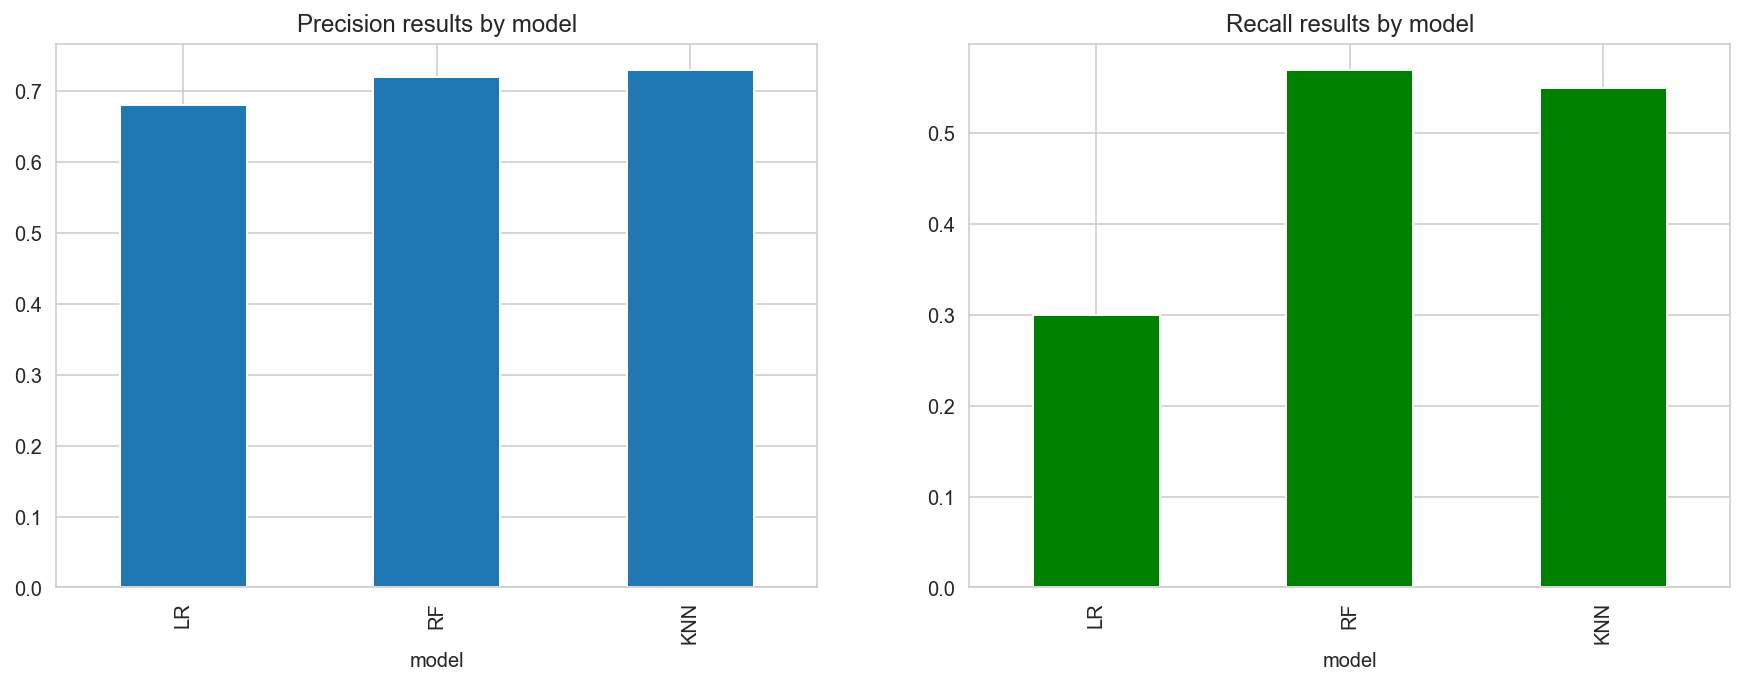

In [244]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
clf_results.plot(x='model', y='precision', kind='bar', title='Precision results by model', legend=False, ax=axis1)
clf_results.plot(x='model', y='recall', kind='bar', title='Recall results by model', legend=False, ax=axis2, color='green')

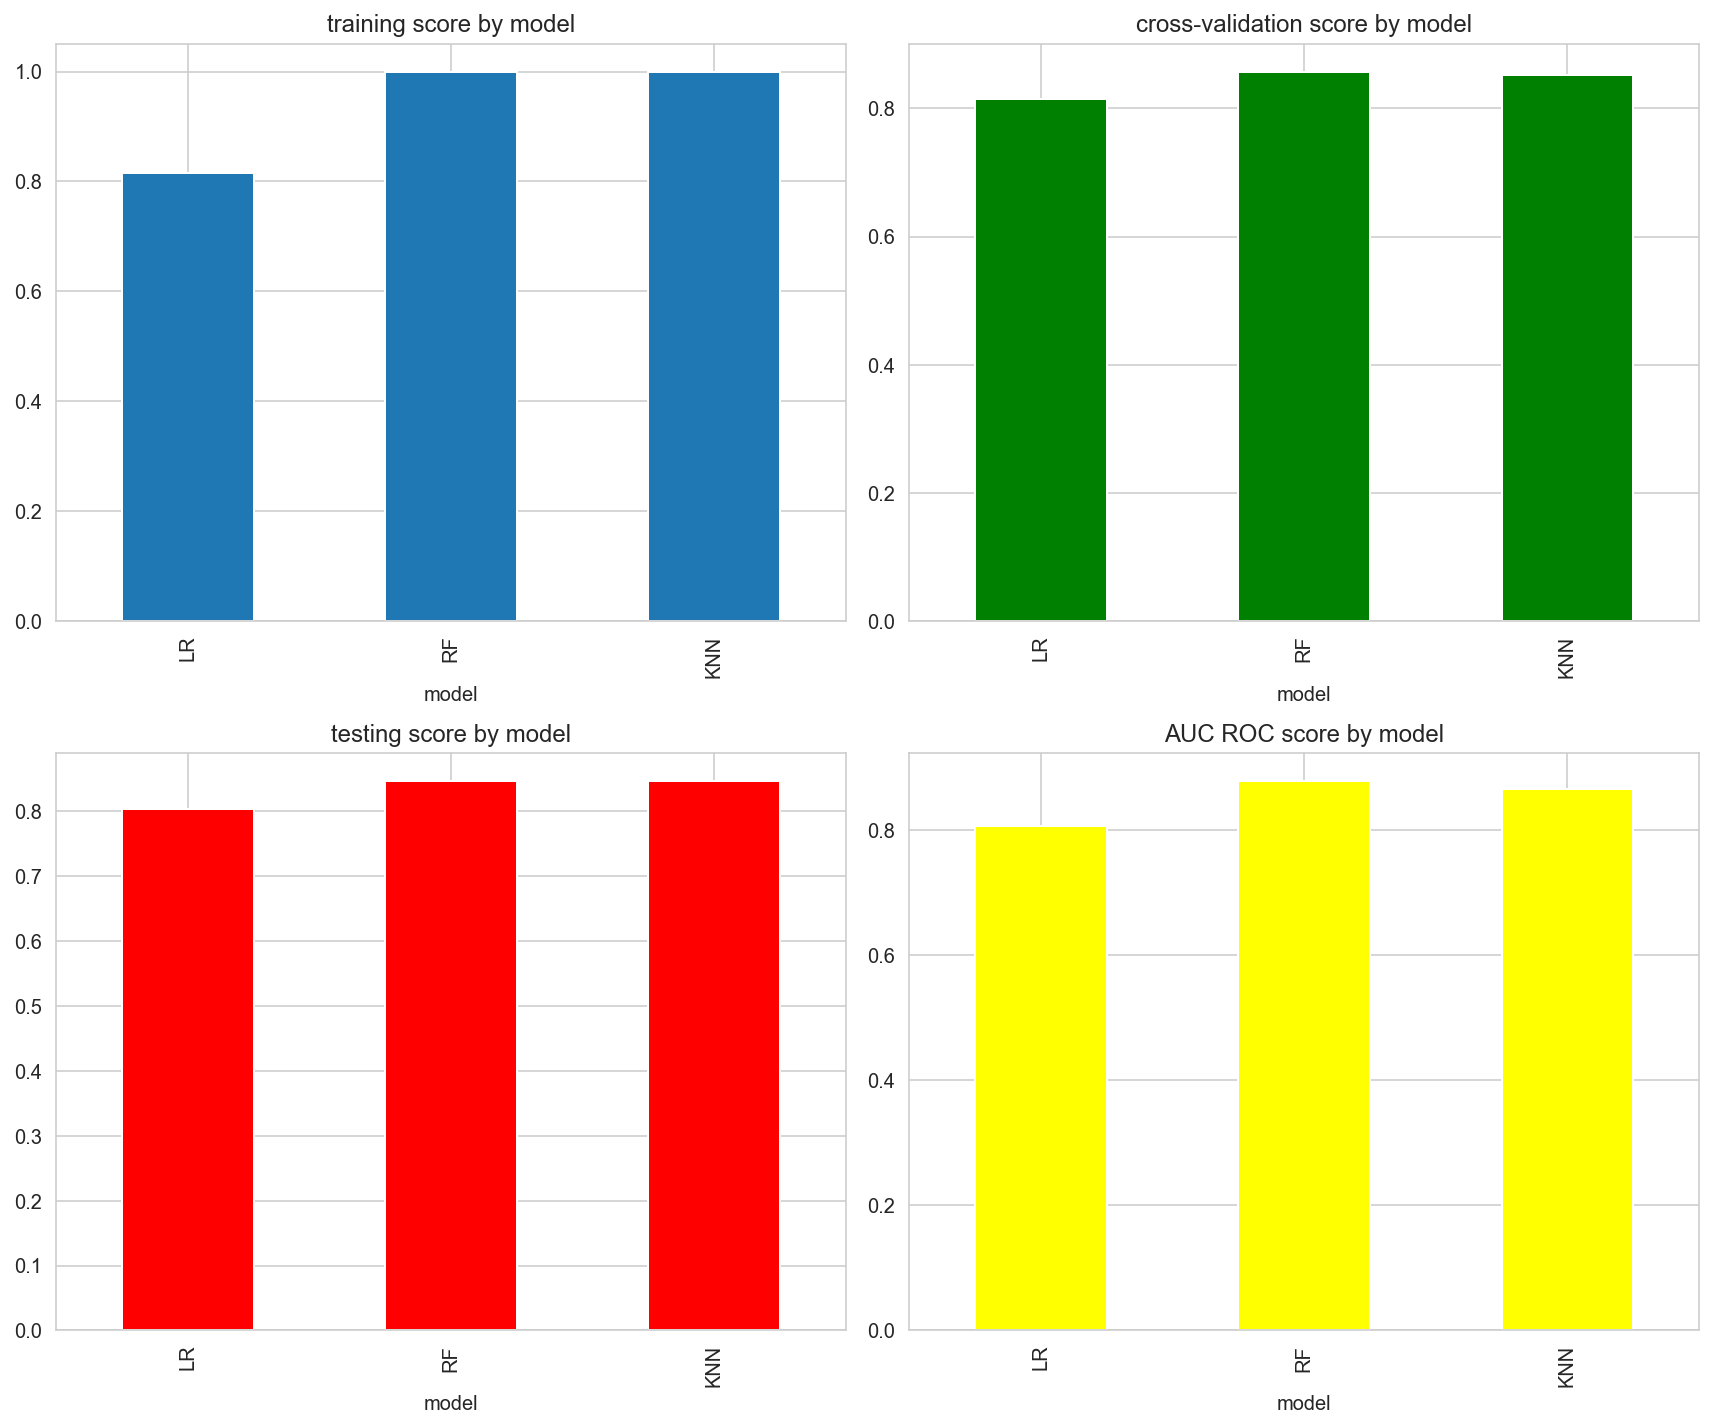

In [245]:
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2, figsize=(12,10))
clf_results.plot(x='model', y='training', kind='bar', title='training score by model', legend=False, ax=axis1)
clf_results.plot(x='model', y='cross_val', kind='bar', title='cross-validation score by model', legend=False, ax=axis2, color='green')
clf_results.plot(x='model', y='testing', kind='bar', title='testing score by model', legend=False, ax=axis3, color='red')
clf_results.plot(x='model', y='AUC_ROC', kind='bar', title='AUC ROC score by model', legend=False, ax=axis4, color='yellow')
plt.tight_layout()

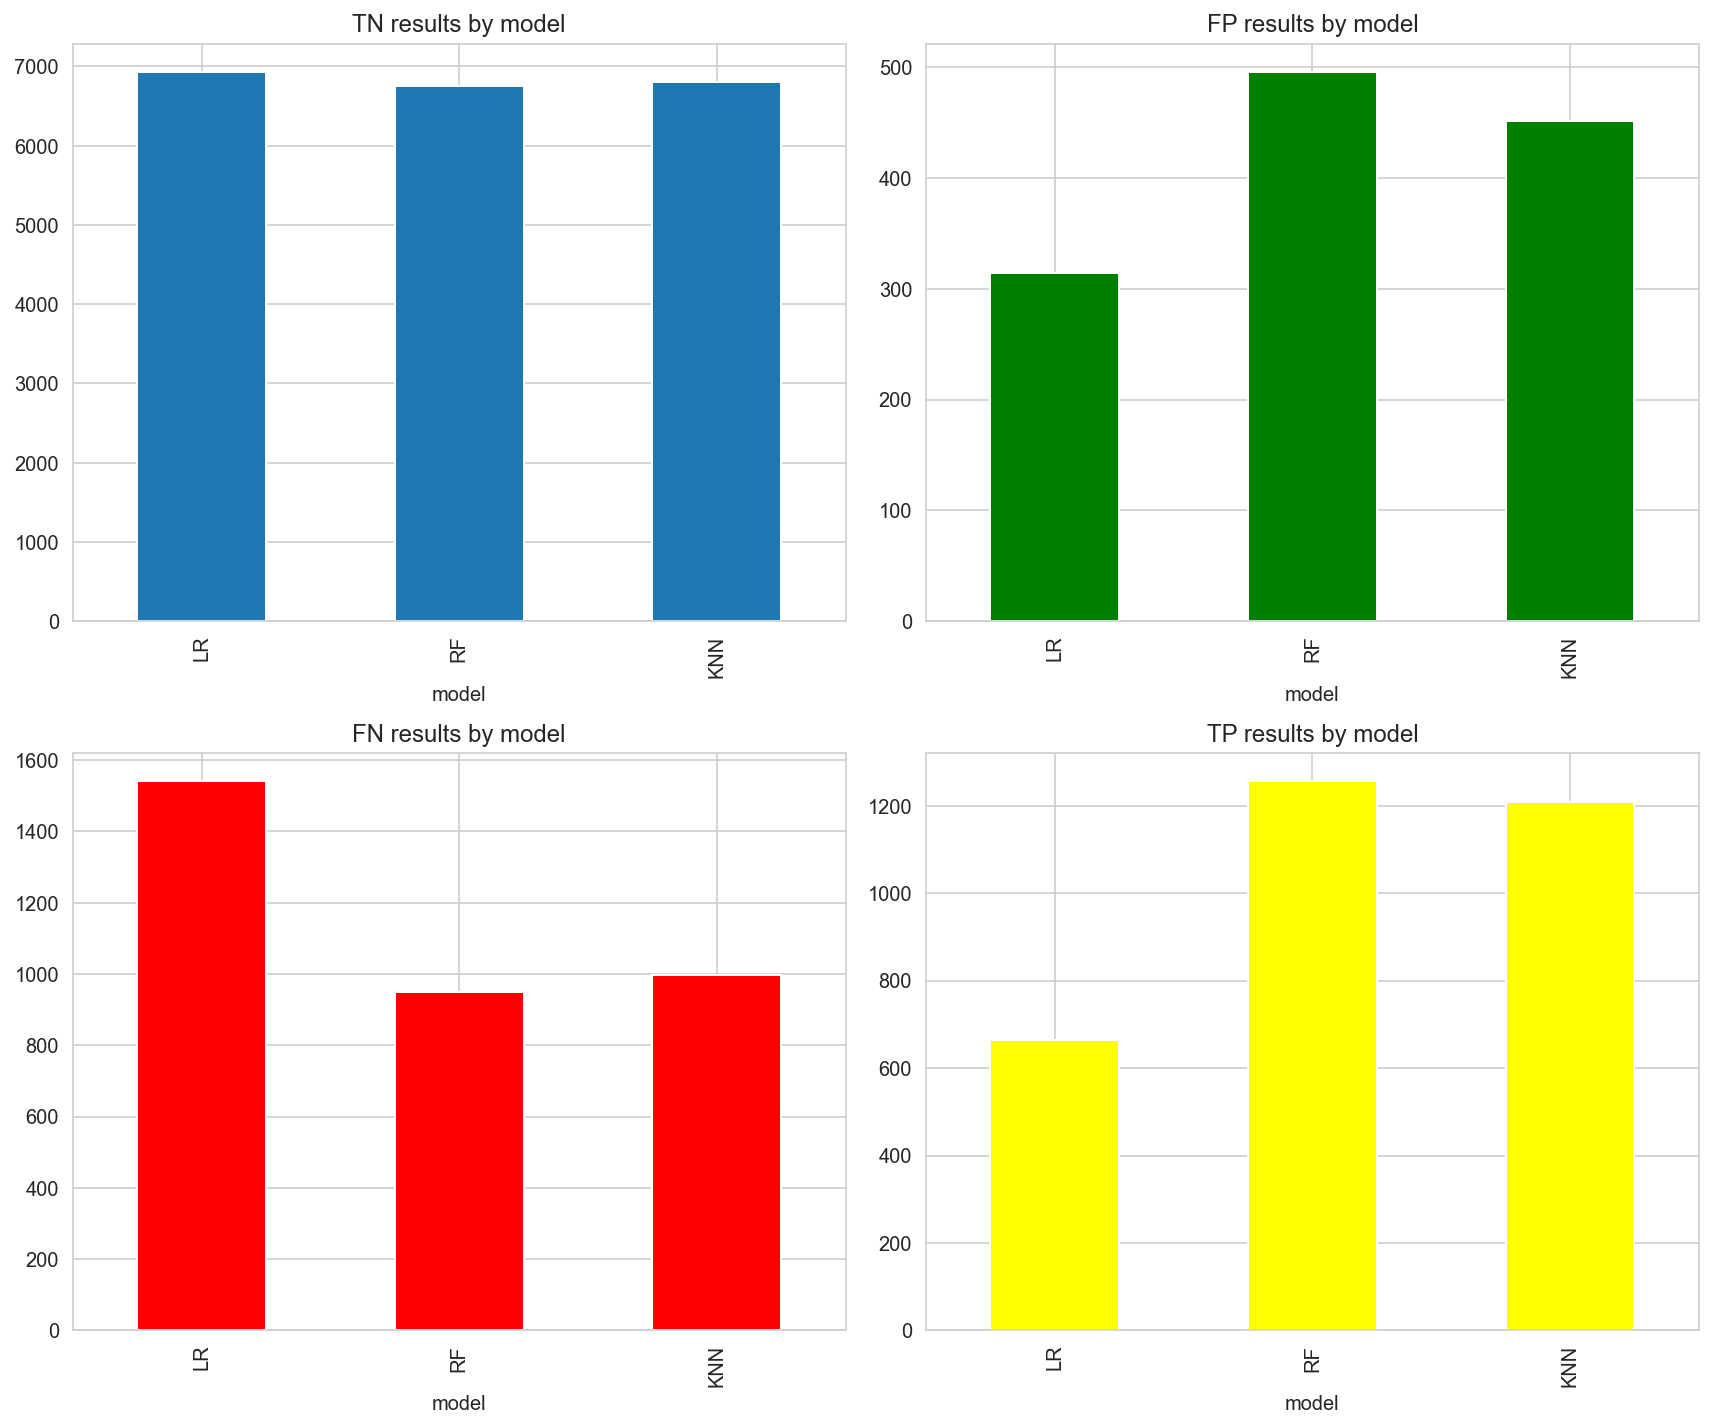

In [246]:
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2, figsize=(12,10))
clf_results.plot(x='model', y='TN', kind='bar', title='TN results by model', legend=False, ax=axis1)
clf_results.plot(x='model', y='FP', kind='bar', title='FP results by model', legend=False, ax=axis2, color='green')
clf_results.plot(x='model', y='FN', kind='bar', title='FN results by model', legend=False, ax=axis3, color='red')
clf_results.plot(x='model', y='TP', kind='bar', title='TP results by model', legend=False, ax=axis4, color='yellow')
plt.tight_layout()

Now, with the best model it will be necessary to filter data with the opportunities to get Loss opportunity result. 